In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd

In [10]:
load_train_data='../input/tienvietnam/tienvietnam'

In [11]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10)

In [12]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset = 'training'
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset = 'validation'
    )

Found 368 images belonging to 9 classes.
Found 69 images belonging to 9 classes.


In [13]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'100k': 0, '10k': 1, '1k': 2, '200k': 3, '20k': 4, '2k': 5, '500k': 6, '50k': 7, '5k': 8}
{'100k': 0, '10k': 1, '1k': 2, '200k': 3, '20k': 4, '2k': 5, '500k': 6, '50k': 7, '5k': 8}


In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(train_data,batch_size=16,epochs=20,verbose=1,validation_data=validation_set)

Epoch 1/20
23/23 [==============================] - 88s 4s/step - loss: 59.0798 - accuracy: 0.3995 - val_loss: 1.1181 - val_accuracy: 0.6957
Epoch 2/20
23/23 [==============================] - 87s 4s/step - loss: 1.7065 - accuracy: 0.7147 - val_loss: 0.5507 - val_accuracy: 0.9420
Epoch 3/20
23/23 [==============================] - 88s 4s/step - loss: 0.2186 - accuracy: 0.9076 - val_loss: 0.6678 - val_accuracy: 0.7101
Epoch 4/20
23/23 [==============================] - 85s 4s/step - loss: 1.9443 - accuracy: 0.8397 - val_loss: 2.0905 - val_accuracy: 0.5797
Epoch 5/20
23/23 [==============================] - 88s 4s/step - loss: 0.3529 - accuracy: 0.9293 - val_loss: 0.3025 - val_accuracy: 0.9565
Epoch 6/20
23/23 [==============================] - 88s 4s/step - loss: 6.9632 - accuracy: 0.8696 - val_loss: 0.2408 - val_accuracy: 0.9420
Epoch 7/20
23/23 [==============================] - 85s 4s/step - loss: 0.1290 - accuracy: 0.9701 - val_loss: 0.2663 - val_accuracy: 0.9275
Epoch 8/20
23/23 [=

In [15]:
score=model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra của mô hình là:',score[0])
print('Độ chính xác kiểm tra của môn hình là:',score[1])

Sai số kiểm tra của mô hình là: 0.27193063497543335
Độ chính xác kiểm tra của môn hình là: 0.9275362491607666


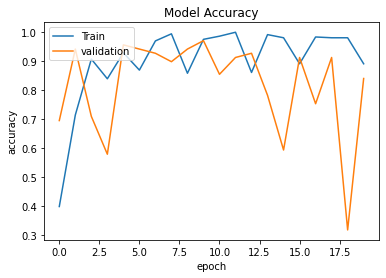

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('./money.h5')

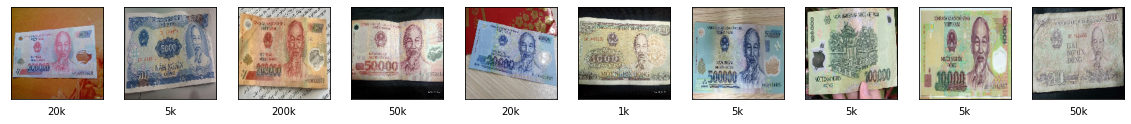

In [17]:
money={0:'100k',
       1:'10k',
       2:'1k',
       3:'200k',
       4:'20k',
       5:'2k',
       6:'500k',
       7:'50k',
       8:'5k'}
import os
filenames=os.listdir("../input/testtien/testtien")
df=pd.DataFrame({'filename':filenames})
url='../input/testtien/testtien/'+df['filename']

plt.figure(figsize=(20,20))
for i in range(df.shape[0]):
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=load_img(url[i],target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.reshape(1,150,150,3)
  img=img/255.0
  img_pred = model.predict(img)
  plt.xlabel(money[np.argmax(img_pred)])
plt.show()